In [1]:
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [2]:
# Load dataset
file_path = r"C:\Users\Naufal\OneDrive\MyDocuments\KULIAH\Tugas Kuliah\TUGAS AKHIR\dataset\dataset hsv\normalized_numbered_gabah_features_completed.xlsx"
df = pd.read_excel(file_path)

In [3]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan parameter grid untuk dicoba
param_grid = {
    'C': [0.1, 1, 10],               # Regularisasi
    'kernel': ['linear', 'rbf'],     # Tipe kernel
    'gamma': ['scale', 'auto']       # Hanya digunakan untuk kernel RBF
}

# Buat model SVC
svc = SVC(probability=True, random_state=42)

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Latih model dengan pencarian grid
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score (CV Accuracy):", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score (CV Accuracy): 0.9370925967512539


In [4]:
# --- Evaluasi pada Data Latih ---
y_train_pred = grid_search.predict(X_train)

# Untuk klasifikasi biner, gunakan average='macro'. Jika multiclass, gunakan 'macro' atau 'weighted'
# Pastikan jenis target anda sesuai (biner atau multiclass)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_accuracy = accuracy_score(y_train, y_train_pred)

print("=== Evaluation Metrics on Training Data ===")
print(f"Accuracy  : {train_accuracy:.4f}")
print(f"Precision : {train_precision:.4f}")
print(f"Recall    : {train_recall:.4f}")
print(f"F1 Score  : {train_f1:.4f}")

print("\n\n=== Classification Report on Train Data ===")
print(classification_report(y_train, y_train_pred))

train_cm = confusion_matrix(y_train, y_train_pred)
print("\n\n=== Confusion Matrix on Training Data ===")
print(train_cm)

# --- Evaluasi pada Data Uji ---
y_pred = grid_search.predict(X_test)

# Untuk klasifikasi biner, gunakan average='macro'. Jika multiclass, gunakan 'macro' atau 'weighted'
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')
test_accuracy = accuracy_score(y_test, y_pred)

print("\n\n=== Evaluation Metrics on Test Data ===")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1 Score  : {test_f1:.4f}")

print("\n\n=== Classification Report on Test Data ===")
print(classification_report(y_test, y_pred))

test_cm = confusion_matrix(y_test, y_pred)
print("\n\n=== Confusion Matrix on Test Data ===")
print(test_cm)

=== Evaluation Metrics on Training Data ===
Accuracy  : 0.9557
Precision : 0.9565
Recall    : 0.9549
F1 Score  : 0.9552


=== Classification Report on Train Data ===
              precision    recall  f1-score   support

           1       0.93      0.98      0.95       624
           2       0.97      0.91      0.94       588
           3       0.97      0.98      0.98       616

    accuracy                           0.96      1828
   macro avg       0.96      0.95      0.96      1828
weighted avg       0.96      0.96      0.96      1828



=== Confusion Matrix on Training Data ===
[[609  13   2]
 [ 39 534  15]
 [  6   6 604]]


=== Evaluation Metrics on Test Data ===
Accuracy  : 0.9301
Precision : 0.9295
Recall    : 0.9331
F1 Score  : 0.9307


=== Classification Report on Test Data ===
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       137
           2       0.94      0.88      0.91       171
           3       0.96      0.97    

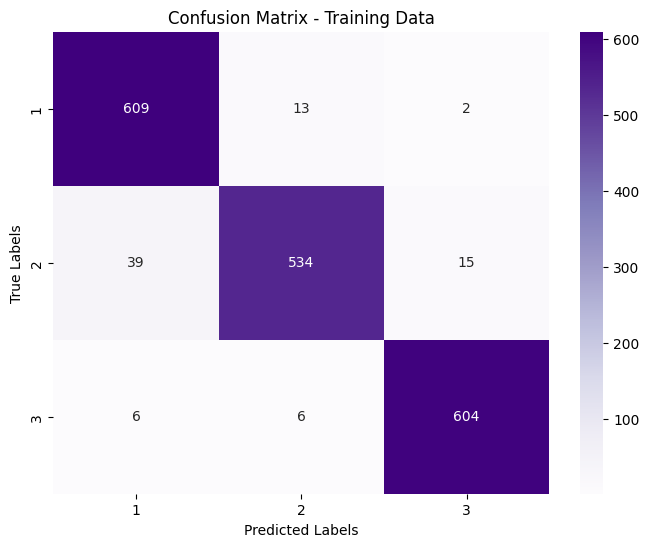



Classification Report for Training Data:
              precision    recall  f1-score   support

           1       0.93      0.98      0.95       624
           2       0.97      0.91      0.94       588
           3       0.97      0.98      0.98       616

    accuracy                           0.96      1828
   macro avg       0.96      0.95      0.96      1828
weighted avg       0.96      0.96      0.96      1828



In [5]:
# Plotting Confusion Matrix for Training Data
conf_matriX_train_reshaped = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matriX_train_reshaped, annot=True, fmt="d", cmap="Purples", xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plotting Classification Report for Training Data
print("\n\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

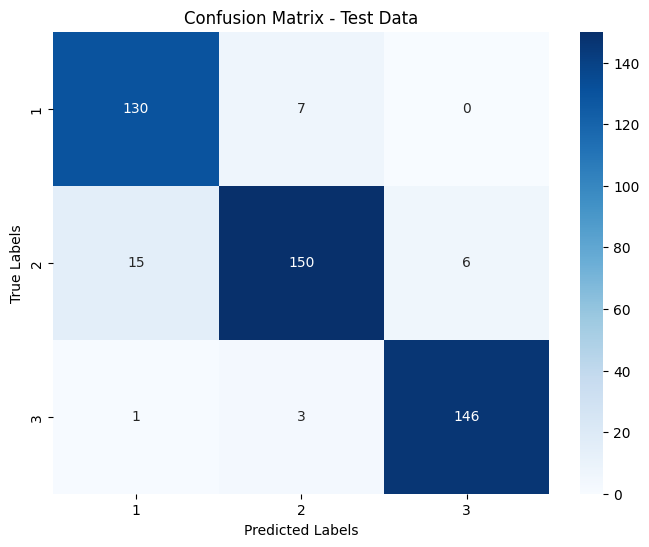



Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       137
           2       0.94      0.88      0.91       171
           3       0.96      0.97      0.97       150

    accuracy                           0.93       458
   macro avg       0.93      0.93      0.93       458
weighted avg       0.93      0.93      0.93       458



In [6]:
# ----- Visualization for Evaluation using plt and seaborn -----

# Plotting Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plotting Classification Report for Test Data
print("\n\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))

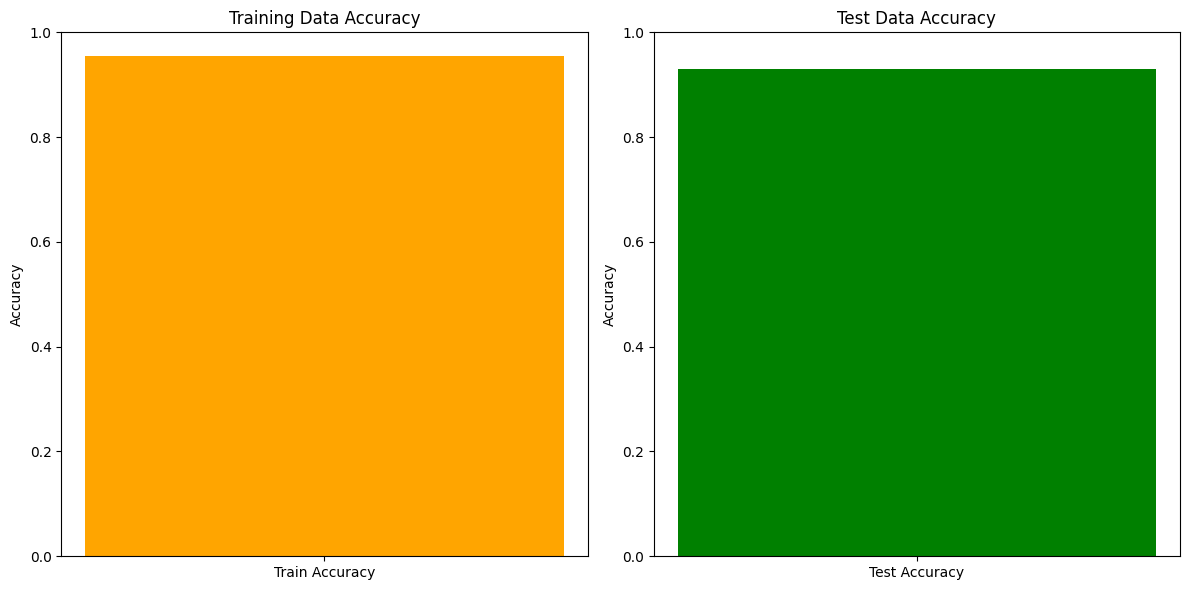

In [7]:
# Membuat figure dan axes untuk 2 subplot (kiri-kanan)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Hitung akurasi
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

# Plotting Akurasi untuk Data Pelatihan (Train)
ax[0].bar(["Train Accuracy"], [accuracy_train], color='orange')
ax[0].set_ylim(0, 1)
ax[0].set_title("Training Data Accuracy")
ax[0].set_ylabel("Accuracy")

# Plotting Akurasi untuk Data Pengujian (Test)
ax[1].bar(["Test Accuracy"], [accuracy_test], color='green')
ax[1].set_ylim(0, 1)
ax[1].set_title("Test Data Accuracy")
ax[1].set_ylabel("Accuracy")

# Menampilkan kedua plot
plt.tight_layout()  # Mengatur agar subplot tidak saling bertumpuk
plt.show()